In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import reconstruction

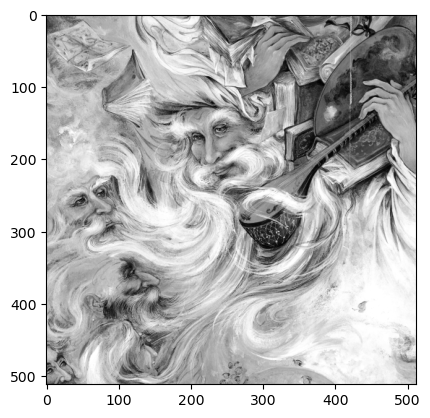

In [2]:
pic_path = 'test_pics\Downloaded Persian Miniatures - Cropped and Resized\Del polvo al polvo (Detalle) 1999 Obras maestras de la miniatura persa; Artista Profesor Mahmud Farshchian, Irn.jpg'

pic = reconstruction.createPicArrayFromPath (pic_path, '')

plt.imshow (pic, cmap='gray')
plt.show ()


In [3]:
def createNeighborhoodVector (pic: np.ndarray, coordinates: tuple) -> list:
    m, n = coordinates[0], coordinates [1]
    return           [pic [m, n-1], 
                      pic [m-1, n-1],
                      pic [m-1, n],
                      pic [m-1, n+1]]

def convertPicInt8ToFloat32 (pic: np.ndarray) -> np.ndarray:
    return np.array (pic, dtype='float32')

def normalizePic (pic: np.ndarray) -> np.ndarray:
    return pic / 255.0;

def createArrayofNeighborhoodVectors (pic: np.ndarray) -> np.ndarray:
    temp = []

    for i in range (pic[1:, 1:-1].shape [0]):
        for j in range (pic[1:, 1:-1].shape [1]):
            temp.append (createNeighborhoodVector (pic, (i, j)))

    neighborhood_vectors_array = np.array (temp, dtype='float32')

    return neighborhood_vectors_array

x1 = createNeighborhoodVector (pic, (2,2))

x1

[123, 128, 135, 139]

In [4]:
pic [1:, 1:-1].ravel ()

array([128, 135, 139, ..., 212, 210, 207], dtype=uint8)

In [5]:
y_values = np.array (pic[1:, 1:-1].ravel (), dtype='float32') / 255.0

y_values

array([0.5019608 , 0.5294118 , 0.54509807, ..., 0.83137256, 0.8235294 ,
       0.8117647 ], dtype=float32)

In [6]:
neighborhood_vectors_array = createArrayofNeighborhoodVectors (pic) / 255.0

neighborhood_vectors_array

array([[0.62352943, 0.8117647 , 0.5019608 , 0.4745098 ],
       [0.54901963, 0.5019608 , 0.4745098 , 0.4862745 ],
       [0.54901963, 0.4745098 , 0.4862745 , 0.49803922],
       ...,
       [0.8117647 , 0.8156863 , 0.8       , 0.80784315],
       [0.8156863 , 0.8       , 0.80784315, 0.83137256],
       [0.8039216 , 0.80784315, 0.83137256, 0.81960785]], dtype=float32)

In [7]:
neighborhood_vectors_array.shape

(260610, 4)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras

model = Sequential ()
model.add (keras.layers.Input ((4,)))
# model.add (Flatten (input_shape = (4,)))
# model.Input ((4,))
# model.add (Dense (units=(4,)))
model.add (Dense (6, activation='tanh'))
model.add (Dense (3, activation='tanh'))
model.add (Dense (1, activation='sigmoid'))


model.compile (optimizer='adam', loss = 'mean_squared_error')

In [11]:
model.fit (neighborhood_vectors_array, y_values, epochs = 10)

Epoch 1/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0101
Epoch 2/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0063
Epoch 3/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0063
Epoch 4/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0063
Epoch 5/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0062
Epoch 6/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0062
Epoch 7/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0062
Epoch 8/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0062
Epoch 9/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0062
Epoch 10/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0062


In [12]:
prediction = model.predict (neighborhood_vectors_array)

8145/8145 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [13]:
prediction

array([[0.5401331 ],
       [0.53366596],
       [0.5428724 ],
       ...,
       [0.8034073 ],
       [0.8190165 ],
       [0.8089824 ]], dtype=float32)

In [14]:
prediction.shape

(260610, 1)

In [15]:
reconstructed = (prediction * 255.0).reshape (pic [1:, 1:-1].shape)

In [27]:
reconstructed

array([[137.73395, 136.08482, 138.43246, ..., 181.07494, 180.22978,
        181.46692],
       [145.83006, 137.83836, 145.62509, ..., 144.37003, 147.75124,
        148.23796],
       [140.81981, 137.8604 , 136.62964, ..., 130.88155, 142.18562,
        143.23654],
       ...,
       [172.98578, 159.59262, 159.36789, ..., 207.7312 , 210.07344,
        205.08469],
       [171.61713, 145.45255, 151.9123 , ..., 207.48622, 201.28633,
        200.74727],
       [165.98436, 139.92169, 141.14525, ..., 204.86887, 208.84921,
        206.29051]], dtype=float32)

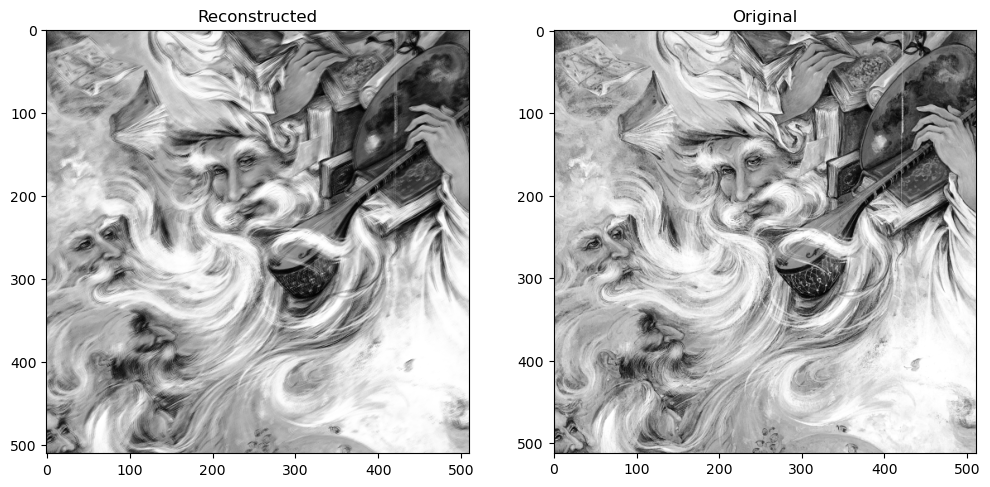

In [16]:
plt.figure (figsize=(12, 7))

plt.subplot (1,2,1)
plt.imshow (reconstructed, cmap='gray')
plt.title ('Reconstructed')

plt.subplot (1,2,2)
plt.imshow (pic, cmap='gray')
plt.title ('Original')

plt.show ()

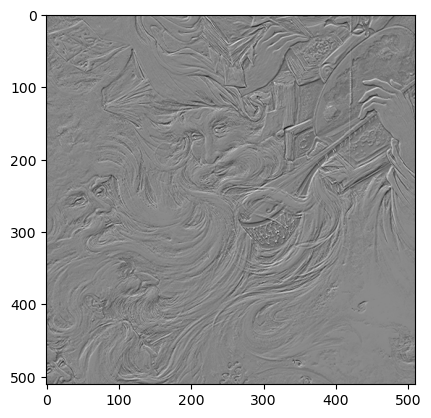

In [17]:
diff_matrix = reconstruction.createDiffMatrixFromMatrices (pic [1:, 1:-1], reconstructed)

plt.imshow (diff_matrix, cmap='gray')
plt.show ()

In [48]:
diff_matrix

array([[ -9.733948  ,  -1.0848236 ,   0.5675354 , ..., -49.074936  ,
        -34.229782  , -37.46692   ],
       [-22.830063  , -12.838364  , -12.625092  , ..., -13.370026  ,
         -1.751236  ,  -2.2379608 ],
       [-18.819809  , -12.860397  ,  -1.6296387 , ...,   3.118454  ,
         -0.18562317,   0.76345825],
       ...,
       [-36.98578   , -25.59262   ,  -9.367889  , ...,  -1.7312012 ,
          1.9265594 ,   3.9153137 ],
       [-49.617126  , -10.452545  , -17.912292  , ...,  -2.4862213 ,
          6.713669  ,   3.2527313 ],
       [-44.98436   , -15.921692  , -14.145248  , ...,   7.131134  ,
          1.1507874 ,   0.7094879 ]], dtype=float32)

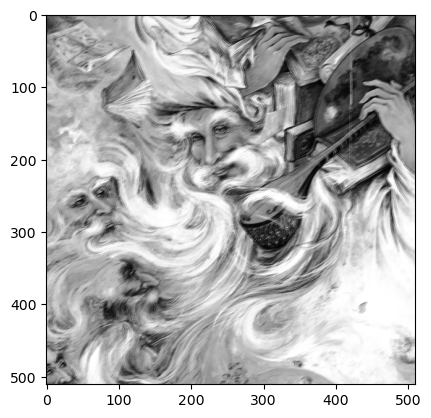

In [32]:
plt.imshow (np.array (reconstructed, dtype='uint8'), cmap='gray')
plt.show ()

In [52]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from skimage.measure.entropy import shannon_entropy

mse_score = mean_squared_error (pic [1:, 1:-1], reconstructed)
ssim_score = structural_similarity (pic [1:, 1:-1], np.array (reconstructed, dtype='uint8'))
entropy_score = shannon_entropy (diff_matrix)

print ('MSE Score: ', mse_score)
print ('SSIM Score: ', ssim_score)
print ('Entropy Score: ', entropy_score)

MSE Score:  400.9377
SSIM Score:  0.517296582259577
Entropy Score:  17.822936054677413


Linear MSE Score:  441.31083992940034
Linear SSIM Score:  0.755968807905708
Linear Entropy Score:  17.84654248476009


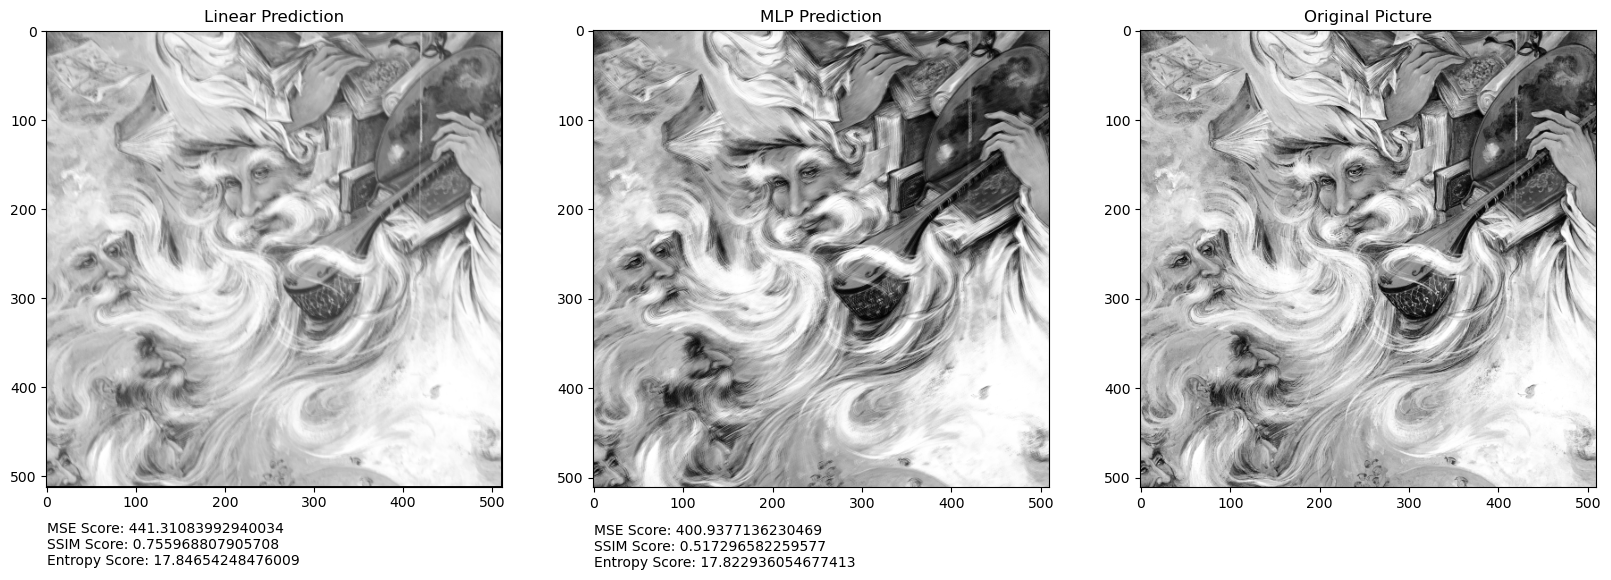

In [93]:
linear_reconstructed = reconstruction.reconstructPicfromACoefs (np.array ([0.33561862, 0.1901073, 0.25668775, 0.2178371]), pic) # ACoefs Optimized


linear_mse_score = mean_squared_error (pic, linear_reconstructed)
linear_ssim_score = structural_similarity (pic , np.array (linear_reconstructed, dtype='uint8'))
linear_entropy_score = shannon_entropy (reconstruction.createDiffMatrixFromMatrices (pic, linear_reconstructed))


print ('Linear MSE Score: ', linear_mse_score)
print ('Linear SSIM Score: ', linear_ssim_score)
print ('Linear Entropy Score: ', linear_entropy_score)

plt.figure (figsize=(20,15))

plt.subplot (1,3,1)
plt.imshow (linear_reconstructed, cmap='gray')
plt.title ('Linear Prediction')
plt.text (0, 600, 'MSE Score: {}\nSSIM Score: {}\nEntropy Score: {}'.format(linear_mse_score, linear_ssim_score, linear_entropy_score))

plt.subplot (1,3,2)
plt.imshow (np.array (reconstructed, dtype='uint8'), cmap='gray')
plt.title ('MLP Prediction')
plt.text (0, 600, 'MSE Score: {}\nSSIM Score: {}\nEntropy Score: {}'.format(mse_score, ssim_score, entropy_score))

plt.subplot (1,3,3)
plt.imshow (pic [1:,1:-1], cmap='gray')
plt.title ('Original Picture')

plt.show ()